## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [54]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [55]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [56]:
# df.count()
df.shape[0]

294478

c. The number of unique users in the dataset.

In [57]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [58]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [108]:
df['converted'].mean()


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [109]:
#df.query('group == "treatment" and landing_page == "old_page"')
#df.query('group == "control"and landing_page == "new_page"')
df.query('group == "control" and landing_page == "new_page" or group == "treatment" and landing_page == "old_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [62]:
#it shows that there is no missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [63]:
df2=df.query("(group == 'treatment' and landing_page == 'new_page') or (group == 'control' and landing_page == 'old_page')")
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [64]:
df2.shape[0]

290585

In [65]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [66]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [67]:
df2[df2["user_id"].duplicated()]['user_id']
#User_id 773192 is duplicated

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [68]:
df2[df2['user_id'].duplicated()]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [69]:
df2.drop(1899, inplace= True)

C:\Users\Fifa\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
# Double Check the duplicate user_id row was removed 
df2[(df2['user_id'] == 773192)]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [71]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [72]:
control_convert= df2[df2['group'] == 'control'].converted.mean()
# Display converts
control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [73]:
treatment_convert= df2[df2['group'] == 'treatment'].converted.mean()
# Display converts
treatment_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [74]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]


0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [75]:
obs_diff = treatment_convert - control_convert 

# Display observed difference
obs_diff

-0.0015782389853555567

**From the mean result above, there is no sufficient evidence to say that the new treatment page leads to more conversions. the conversation rate between the control and treatment such a small difference does not indicate that there is sufficient evidence to suggest that the new treatment page leads to more conversions. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


## Nullhypotheses: H0: P old ≥ P new
 
## Alternative hypotheses: H1: P old < P new

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [76]:
convert_rate= df2['converted'].mean()
# Display convert_ rate
convert_rate

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [77]:
#old converted rate equals to the new converted rate regardless of page
convert_rate

0.11959708724499628

c. What is $n_{new}$?

In [78]:
#Compute the number of unique users who has new page using df2 dataframe
nnew=df2[df2['group']=='treatment'].count()[0]
nnew

145310

d. What is $n_{old}$?

In [79]:
#Compute the number of unique users who has old page  using df2 dataframe
nold=df2[df2['group']=='control'].count()[0]
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [80]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
n_new_size=df2.query('group == "treatment"').shape[0]
new_page_converted = np.random.choice(2, n_new_size, replace = True, p=[(1-convert_rate), convert_rate])
# Display
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [81]:
#Simulate  n_old  transactions with a convert rate of  p_old  under the null
n_old_size = df2.query('group == "control"').shape[0]
old_page_converted = np.random.choice(2, n_old_size, replace = True, p=[(1-convert_rate), convert_rate])
# Display
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [82]:
new_page_converted.mean() - old_page_converted.mean()

0.0002731820091976811

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [111]:
# Create sampling distribution for difference in completion rates

new_page_converted = np.random.binomial(n_new_size, convert_rate, 10000)/n_new_size
old_page_converted = np.random.binomial(n_old_size, convert_rate, 10000)/n_old_size
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

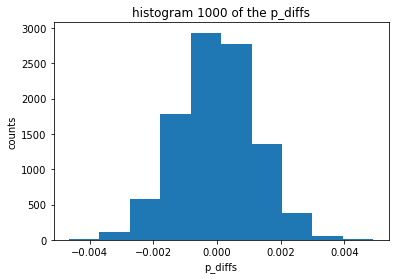

In [112]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('counts')
plt.title('histogram 1000 of the p_diffs')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

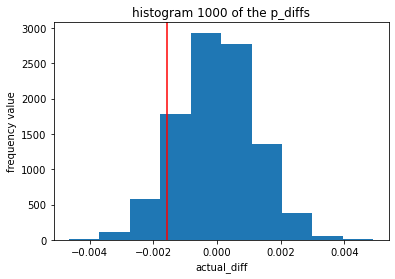

In [113]:
plt.hist(p_diffs)
actual_diff=df2[df2['group']== 'treatment'].converted.mean() - df2[df2['group']== 'control'].converted.mean()
plt.axvline(x=actual_diff, color='red');
plt.xlabel('actual_diff')
plt.ylabel('frequency value')
plt.title('histogram 1000 of the p_diffs')
plt.show()

In [114]:
actual_diff

-0.0015782389853555567

In [115]:
(np.array(p_diffs) > actual_diff).mean()


0.9049

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What was computed in part j? the p-value
is the measurement of the probability of observing a statistic,
(conversion rate) if the null hypothesis is true.
to make it success meaning to reject H0 (the null hypotheses): 
p-value must be greater than 0.95 (strong evidence against the null(reject the null) ) or less than 0.05 (weak evidence against the null (fail to reject the null))
so we failed to reject null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [91]:
#Import regression model library

import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1').shape[0]
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]
n_old = df2.shape[0] - df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]
# display
convert_old , convert_new , n_old , n_new

(17489, 17264, 145310, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [92]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new
], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
z_score

1.286299137965753

In [93]:
 p_value

0.9008306583826964

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**P-value is a probability that we have falsely rejected the null hypothesis. Z-score measures standard deviation
(the number of standard deviations from the mean a data point is), another test of statistical significance that
helps us decide whether or not to reject the null. we finding that p-value not higher than 0.95 so we will accept the null hypothesis and reject the alternative based on our hypothesis testing. and yes, this result agreed with parts j & k**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**a logistic regression should be used in this case to determine the coefficient effect on conversion. since we want to predict 1 of 2 possible outcomes: whether a user will
convert or not depending on the page (old or new).**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [94]:
#create a column for the intercept
df2['intercept']=1
#create a dummy variable column for which page each user received
#used get dummies to have all variable in the column namericale
#what we do here if control is 1 , treatment shuld be 0 and vise versa
df2[['control','treatment']]= pd.get_dummies(df2['group'])

<ipython-input-94-717b49c074f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept']=1
C:\Users\Fifa\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [95]:
#ab_page column will be 1 when individual receives the treatment and 0 if control.
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

<ipython-input-95-5064f407b2bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [96]:
#Use statsmodels to import regression model
import statsmodels.api as sm
#Create Logit regression model for conveted variable and  ab_page
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [97]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:44:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value for old page= 0.0 Statistically significant
p-value for new (ab) page=0.190 Not statistically significant p-value in ab_page is 0.190. These p-values differ from Part II because in the A/B test our null hypothesis states that the old page is better in Part II unless the new page proves to be definitely better at a Type I error rate of 5%. A null hypothesis for this circumstance would be that the old page has the same conversion rate as the new page, and the alternative hypothesis would be that the pages have different conversion rates, which is more succinct that Part II which has a null that the old page is better than the new page, and the alternative that the new page is better than the old.**
**last one is two sided test and in Part II was one sided test.Here we test for not equal in our hypotheses there wad greater than or equal.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There might be many factors that can effect individual converts . usage and access may effect the rate of conversion. Other factor can be the time(timestamp variable), we can further convert time as categorical variable which includes "A.M or P.M", the disadvantage of adding additional terms into a regression model is more complexity like we may miss some other influencing factors which lead to unreliable and contradictory results compared to old results**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [98]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [99]:
###Join ab dataset with country dataset
df3=pd.merge(df2, countries_df, how='left', on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,US


In [100]:
#Create intercept variable
#dummy 
df3['intercept'] = 1
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])
df3.head()


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,US,0,0,1


**based on the above result we can accept Null Hypothesis as there is no significant difference in conversion rates and reject alternate hypothesis. There may be limitations due to incorrect**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [101]:
df3['UK_new'] = df3['UK'] * df3['ab_page']
df3['US_new'] = df3['US'] * df3['ab_page']

In [102]:
#Create Logit regression model for conveted variable and  ab_page , UK ,us
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US','UK_new','US_new']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:               3.482e-05
Time:                        22:44:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_new         0.0783      0.057      1.378      0.168      -0.033       0.190
US_new         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [103]:
np.exp(results.params)


intercept    0.134794
ab_page      0.934776
UK           1.011854
US           1.017682
UK_new       1.081428
US_new       1.048001
dtype: float64

In [104]:
1/np.exp(results.params)


intercept    7.418713
ab_page      1.069775
UK           0.988285
US           0.982625
UK_new       0.924703
US_new       0.954198
dtype: float64

<a id='conclusions'></a>
## Conclusions
According to the analysis performed I found that the old page was better than the new page,
By the one tailed hypothesis test results, There is not a significant difference in the conversion rates between the old and new pages.
Logistic Regression also gives results that agree with the results of A/B testing. Country does not appear to be a very useful factor in the regression model. 
So, the recommendation is to retain the old version of the page, because I fail to reject the null hypothesis, so No reason for the company to change to the new site (given that there should be a less than 5% risk of making a type I-error).

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.